In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
yelp=pd.read_csv('D:\Placements\key academic projects\Optimization Algorithms in ML\yelp.csv')

In [7]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [10]:
yelp['text length']=yelp['text'].apply(len)

In [11]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [12]:
sns.set_style('white')

C:\Users\Shashwat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


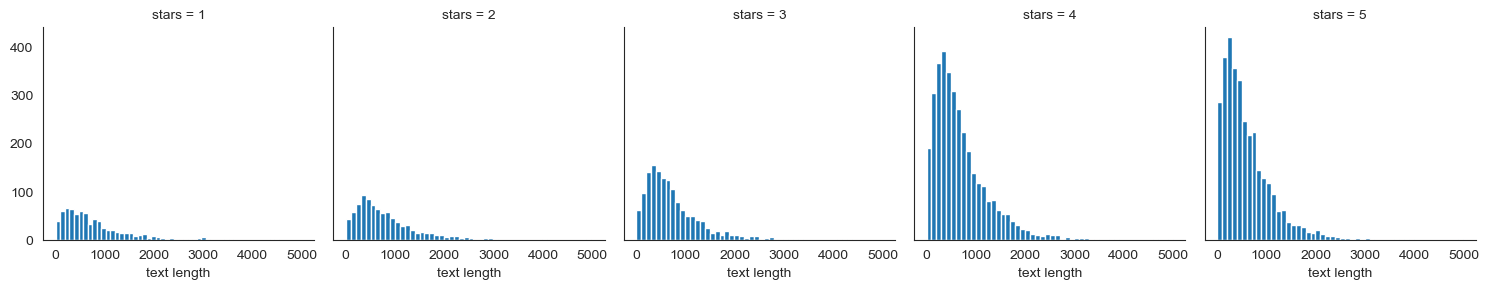

In [14]:
g= sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

<Axes: xlabel='stars', ylabel='text length'>

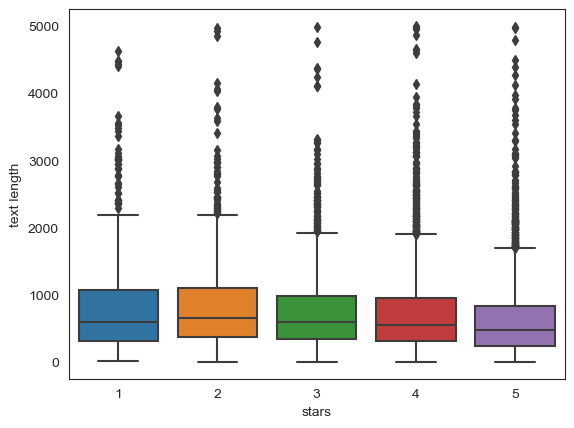

In [15]:
sns.boxplot(x='stars',y='text length',data=yelp)

<Axes: xlabel='stars', ylabel='count'>

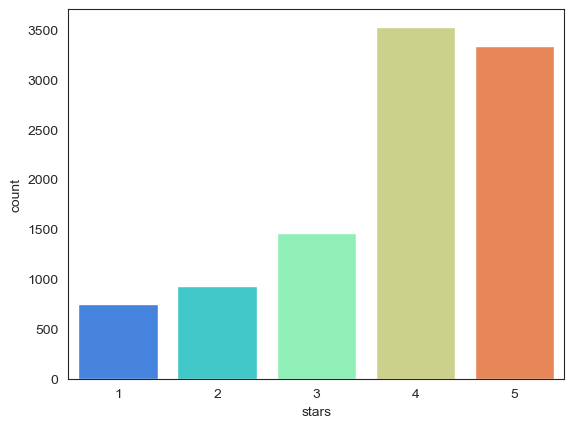

In [23]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [26]:
#NLP
# create a dataframe called yelp_class that contains only 1 and 5 stars reviews
yelp_class= yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [27]:
# feature and target/labels
X= yelp_class['text']
y= yelp_class['stars']

In [29]:
#import CountVectorizer and create its object
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [30]:
#use fit_transform method on cv and pass X. Save this by overriding X
X=cv.fit_transform(X)

In [32]:
#splitting of data into training and test data
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [35]:
#train a model and import MultinomialNB to create an instance of estimator and call it nb 
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [36]:
# fit nb using the training data
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
#prediction and evaluation, use the predict method of nb to predict labels from X_test
predictions= nb.predict(X_test)

In [38]:
#create a confusion matrix and classification report using these predictions and y_test
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[ 168   79]
 [  29 1073]]


              precision    recall  f1-score   support

           1       0.85      0.68      0.76       247
           5       0.93      0.97      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.89      0.83      0.85      1349
weighted avg       0.92      0.92      0.92      1349



In [41]:
# include TF_IDF to this process using a pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
from sklearn.pipeline import Pipeline

In [45]:
# creating a pipeline with following steps/stages
pipe = Pipeline([ ('bow',CountVectorizer()) ,
                 ('tfidf',TfidfTransformer()), 
                 ('model',MultinomialNB()) ])

In [46]:
#using the pipelining 'remember this pipeline has all the preprocess steps in it already, meaning we will need to re-split
# the original data
# train test split
X= yelp_class['text']
y= yelp_class['stars']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [47]:
# fitting the pipeline to the training data.Remember we can't use the same training data as last time because that data has already been vectorized. we need to pass in just the text and labels
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [48]:
# now use pipeline to predict from the X_test and create a classification report and confusion matrix
predictions= pipe.predict(X_test)

In [49]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[   0  247]
 [   0 1102]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       247
           5       0.82      1.00      0.90      1102

    accuracy                           0.82      1349
   macro avg       0.41      0.50      0.45      1349
weighted avg       0.67      0.82      0.73      1349



C:\Users\Shashwat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shashwat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shashwat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
